# 04.01 least squares and the normal equations

##### code, support for section text

In [ ]:
if False: # settings for sensei
  from google.colab import auth
  from googleapiclient.discovery import build

  auth.authenticate_user()
  about = build('drive','v3').about().get(fields='user').execute()
  if about['user']['displayName'] == "Sun K.":

    # output to pdf setting
    from google.colab import output
    output.no_vertical_scroll()
    #output.no_horizontal_scroll() # sigh, doesnt exist

In [ ]:
if True: # settings for the people
  import matplotlib.pyplot as plt
  import numpy as np
  import pandas as pd
  from tabulate import tabulate

  pd.set_option('display.max_rows',10)


###### code, horners

In [ ]:
def horners(cs,x):
  """
  cs : coefficients = a[n] ... a[2],a[1],a[0]
  x : lol, really?

  returns : evaluated nested polynomial
  """
  rc = None
  if cs:
    i = len(cs) - 1
    rc = cs[i]
    for i in reversed(range(i)):
      rc = rc*x + cs[i]
  return rc


###### code, images in order of appearance

In [ ]:
# this is a plain jane, no special method script to plot the previous system

def img_lsq_eqns(x_approx):

  # system, y ≡ x₂(x₁,b)
  y1 = lambda x: 2 - x
  y2 = lambda x: x - 1
  y3 = lambda x: 3 - x

  # intervals
  xs = np.array([0,4])
  ys_1 = y1(xs)
  ys_2 = y2(xs)
  ys_3 = y3(xs)

  # plot, cfg
  plt.close("all")

  # plot, data
  plt.scatter(x_approx[0,0],x_approx[1,0],label="best one",marker="*",c="red",s=100,zorder=10)
  plt.plot(xs,ys_1,label="$f_1(x) = 2 - x$")
  plt.plot(xs,ys_2,label="$f_2(x) = x - 1$")
  plt.plot(xs,ys_3,label="$f_3(x) = 3 - x$")

  # plot, set style
  plt.grid()
  plt.title(f"least squares\n")
  plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
  plt.ylabel("y")
  plt.xlabel("x")

  # plot, show
  plt.show()


In [ ]:
def img_lsq_data():
  ts = np.array([2,5.5,7,10.5,13])
  ys = np.array([4.5,4,8,7,7])

  ts_dis = np.linspace(min(ts)-1,max(ts)+1,101) # display interval
  optics = lambda x: 3 + x/2 #lies lies lies

  # least squares
  pr_lsq = np.polyfit(ts,ys,deg=1,full=True) # coeffs, residual, stuff
  pc_lsq = pr_lsq[0] # coeffs
  if False: # display, error
    pr_lsq_se = pr_lsq[1] # SE
    print(f"\n  SE: {pr_lsq_se}")
    print(f"\nRMSE: {np.sqrt(pr_lsq_se/len(xs))}")
    print(f"\n   y: {pc_lsq[1]} {pc_lsq[0]:+}·x") # coeffs in reverse order
  px_lsq = np.poly1d(pc_lsq) # poly object from coeffs
  ps_lsq = px_lsq(ts_dis) # y = p(x) over interval

  # plot, cfg
  plt.close("all")

  # plot, data
  plt.scatter(ts,ys,c="black",zorder=10)
  plt.plot(ts_dis,optics(ts_dis)) # lies lies lies
  plt.plot(ts_dis,ps_lsq,lw=20,alpha=.1)

  offset = 0.1
  s_data = ""
  s_error = ""
  for i,(t,y) in enumerate(zip(ts,ys)):
    f = optics(t)
    dy = f - y
    s_data = f"($t_{i+1}$,$y_{i+1}$)"
    s_error = f"$e_{i+1}$"
    plt.plot([t,t],[y,f],c="grey")
    if dy < 0:
      plt.text(t-6*offset,y+7*offset,s_data)
      plt.text(t-7*offset,y-abs(dy)/2,s_error)
    else:
      plt.text(t-6*offset,y-10*offset,s_data)
      plt.text(t+3*offset,y+abs(dy)/4,s_error)

  # plot, style
  plt.xlim(0,15)
  plt.ylim(0,15)
  # plot, show
  plt.show()


###### code, examples

In [ ]:
# example 03: uses polyfit,poly1d

def eg_03():

  xs = np.array([1,-1,1])
  ys = np.array([2,1,3])

  # get least squares fit
  #pc_lsq = np.polyfit(xs,ys,deg=1) # coeffs, default is lsq
  pr_lsq = np.polyfit(xs,ys,deg=1,full=True) # coeffs, residual, stuff
  pc_lsq = pr_lsq[0] # coeffs

  # use least squares fit
  px_lsq = np.poly1d(pc_lsq) # poly object from coeffs
  xs_dis = np.linspace(min(xs)-1,max(xs)+1,101) # display interval
  ps_lsq = px_lsq(xs_dis) # y = p(x) over interval

  if True: # plot
    # plot, cfg
    plt.close("all")

    # plot, data
    plt.scatter(xs,ys,c="C0",marker="o",label="some data")
    plt.plot(xs_dis,ps_lsq,c="C0",linestyle=":",label=str(px_lsq))

    # plot, labels
    offset = 0.1
    sxy = []
    for i,x in enumerate(xs):
      sxy.append(f"({xs[i]},{ys[i]})")
    for i,label in enumerate(sxy):
      plt.text(xs[i]+offset,ys[i]+offset,label)

    # plot, style
    plt.title("\nbest linear model for some data,\n\nleast squares\n")
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    plt.ylabel("y")
    plt.xlabel("x")
    # plot, show
    plt.show()

  if True: # error
    # display, error
    pr_lsq_se = pr_lsq[1] # SE
    print(f"\n  SE: {pr_lsq_se}")
    print(f"\nRMSE: {np.sqrt(pr_lsq_se/len(xs))}\n")

  if True: # dataframe
    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((xs.size,4),np.nan) # cols = t,y,model,error
    ps[:,0] = xs
    ps[:,1] = ys
    ps[:,2] = px_lsq(xs)
    ps[:,3] = ps[:,1] - ps[:,2]
    sCol = ["t","y","model","error"] # pandas can use latex, i guess?
    df = pd.DataFrame(data=ps,columns=sCol)
    df["error"] = df["error"].apply("{:.4f}".format)
    display(df)


In [ ]:
# example 04 # during lecture, ok?

#  # data for example 04
#  xs = np.array([-1,0,1,2])
#  ys = np.array([-1,0,0,-2])

# 01 copy-pasted previous code cell for example 03
# 02 renamed pasted code cell to example 04
# 03 replaced lines 10,11 with xs,ys above
# 04 updated line 15 argument "deg" to 2 from 1 (and later to 3 for kicks)
#
# nothing else needs to change - no labels, no anything

In [ ]:
# example 05: uses least squares

def eg_05(nc,ny,snark="lol"):
  """
  nc : # unkowns = coeffs
  ny : # equations
  snark : (known) commentary
  """

  xs = np.linspace(2.0,4.0,ny) # these are not unknown
  ys = horners([1]*nc,xs) # populate b = y[i]
  vdm = np.ones((ny,nc))
  for j in reversed(range(1,nc)):
    for i in range(ny):
      for k in range(j,nc):
        vdm[i,k] *= xs[i]

  # get best numpy solution
  cs_sys,r_sys,rank_sys,s_sys = np.linalg.lstsq(vdm,ys,rcond=None)

  # get lecture/basic least squares solution
  ata = vdm.T @ vdm
  atb = vdm.T @ ys
  cs_lsq = np.linalg.solve(ata,atb)

  print(f"\nsys: {cs_sys} = {snark}")
  print(f"\nbc cond(vdm): {np.linalg.cond(vdm):.2f}")
  print(f"\nlsq: {cs_lsq} = {snark}++")
  print(f"\nbc cond(ata): {np.linalg.cond(ata):.2f}")



## 0 intro

least squares as an idea has been around since gauss and legendre, depending on how you define "as an idea". and "L2" is all over, underpinning this modern world.

rootfinding has been cases where solutions exist, exact or approximate; what about when they dont exist? interpolation has focused on models that intersect all data; is that always the best model?

## 1 inconsistent systems of equations

\begin{align}
  x_1 + x_2 &= 2 \\
  x_1 - x_2 &= 1 \\
  x_1 + x_2 &= 3.
\end{align}

who do you uninvite to the party? lets not have math be exclusionist; lets compromise with a solution that comes close. interpret "close" in terms of euclidean distance as method of the week.

for $m\times n$ system $Ax=b$, C

\begin{align}
  \begin{bmatrix} 1 & 1 \\ 1 & -1 \\ 1 & 1 \end{bmatrix}
  \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
  &=
  \begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix} \\
  \\
  &\Downarrow \quad\text{or} \\
  \\
  x_1 \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
  +
  x_2 \begin{bmatrix} 1 \\ -1 \\ 1 \end{bmatrix}
  &=
  \begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix}
  \quad\Rightarrow\quad
  x_1v_1 + x_2v_2 + \dots + x_nv_n = b.
\end{align}

ie, hit target 3d $b$ with two 3d vectors, $x_1,x_2$. "closest" to $b$ is in the plane $Ax = x_1 + x_2$ in $\mathbb{R}^3$.

In [ ]:
#import numpy as np

a = np.array([[1,1],[1,-1],[1,1]])
b = np.array([[2],[1],[3]])

ata = a.T@a
atb = a.T@b
x_approx = np.linalg.solve(ata,atb)
print(x_approx)


[[1.75]
 [0.75]]


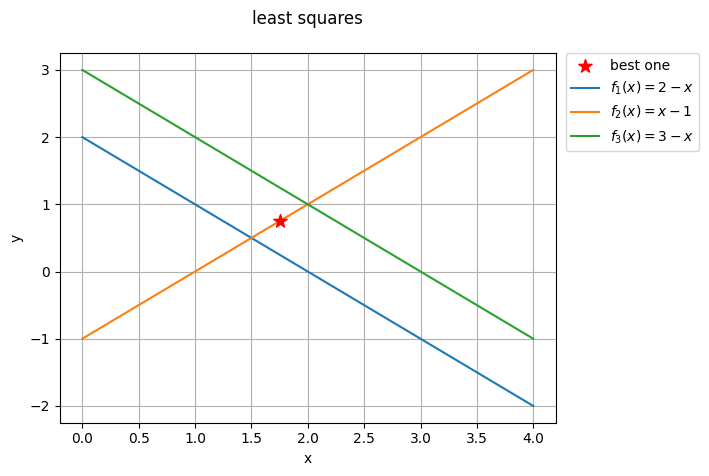

In [ ]:
img_lsq_eqns(x_approx)

there is no $x_1,x_2$ that solves the problem but there is a point in the plane $Ax$ of all possible candidates that is closest to $b$. also, $\vec{r} = b - A\bar{x}$ is perpendicular to $\{Ax|x\in\mathbb{R}^n\}$.

recall: $A_{m\times n}^T$ is $n\times m$ matrix; $(A+B)^T = A^T + B^T$; $(AB)^T = B^TA^T$.

\begin{align}
  \color{red}{\vec{r}} &= b - A\bar{x} \color{blue}{\perp \{Ax|x\in\mathbb{R}^n\}} \\
  \\
  &\Downarrow \quad \vec{r}\ne 0 \text{ but imagine it for a moment} \\
  \\
  \color{blue}{(Ax)^T}(b-A\bar{x}) &= \color{red}{0} \quad \forall\text{ } x\in \mathbb{r}^n \\
  \\
  &\Downarrow \\
  \\
  x^TA^T(b-A\bar{x}) &= 0 \quad \forall\, x\in \mathbb{r}^n \\
  \\
  &\Downarrow \quad A^T(b-A\bar{x}) \perp\text{ all } x\in \mathbb{R}^n \\
  \\
  A^T(b-A\bar{x}) &= 0 \\
  \\
  &\Downarrow \quad \text{least squares solution} \\
  \\
  A^TA\bar{x} &= A^Tb.
\end{align}

<b>normal equations for least squares</b>

given inconsistent system $Ax = b$, solve $A^TA\bar{x} = A^Tb$
where $\bar{x}$ that minimizes the euclidean length of the residual $r=b-Ax$.


##### example 01


use normal equations to find least squares solution of inconsistent system

$$
A = \begin{bmatrix} 1 & 1 \\ 1 & -1 \\ 1 & 1 \end{bmatrix}, \quad
b = \begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix}.
$$

\begin{align}
  A^TA &=
  \begin{bmatrix} 1 & 1 & 1 \\ 1 & -1 & 1 \end{bmatrix}
  \begin{bmatrix} 1 & 1 \\ 1 & -1 \\ 1 & 1 \end{bmatrix}
  = \begin{bmatrix} 3 & 1 \\ 1 & 3 \end{bmatrix}, \\
  \\
  A^Tb &=
  \begin{bmatrix} 1 & 1 & 1 \\ 1 & -1 & 1 \end{bmatrix}
  \begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix}
  = \begin{bmatrix} 6 \\ 4 \end{bmatrix}. \\
  \\
  &\Downarrow \quad\text{normal equations} \\
  \\
  \begin{bmatrix} 3 & 1 \\ 1 & 3 \end{bmatrix}
  \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
  &= \begin{bmatrix} 6 \\ 4 \end{bmatrix} \\
  \\
  &\Downarrow \quad\text{gaussian elimination} \\
  \\
  \begin{bmatrix} 3 & 1 & | & 6 \\ 1 & 3 & | & 4 \end{bmatrix}
  &\rightarrow
  \begin{bmatrix} 3 & 1 & | & 6 \\ 0 & \frac{8}{3} & | & 2 \end{bmatrix}
  \quad\Rightarrow\quad \bar{x}
  = \begin{bmatrix} \bar{x_1} \\ \bar{x_2} \end{bmatrix}
  = \begin{bmatrix} \frac{7}{4} \\ \frac{3}{4} \end{bmatrix}.
\end{align}

\begin{align}
  \begin{bmatrix} 1 & 1 \\ 1 & -1 \\ 1 & 1 \end{bmatrix}
  \begin{bmatrix} \frac{7}{4} \\ \frac{3}{4} \end{bmatrix}
  &= \begin{bmatrix} 2.5 \\ 1 \\ 2.5 \end{bmatrix}
  \ne \begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix}
  \quad\text{ remember youve solved exactly for a system where }\vec{r}\ne 0 \\
  \\
  &\Downarrow \quad\text{and} \\
  \\
  r &= b - A\bar{x} =
  \begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix} -
  \begin{bmatrix} 2.5 \\ 1 \\ 2.5 \end{bmatrix} =
  \begin{bmatrix} -0.5 \\ 0.0 \\ 0.5 \end{bmatrix}
\end{align}

if $r$ is zero, the solution is exact. if not, the euclidean length of the residual vector is a backward error measure of how far $\bar{x}$ is from being a solution. the size of the residual is expressed in more than one way:

\begin{align}
  \text{euclidean 2-norm, } ||r||_2 &= \sqrt{r_1^2 + \dots + r_m^2} \\ \\
  \text{squared error, } SE &= r_1^2 + \dots + r_m^2 \\ \\
  \text{root mean squared error, } RMSE &= \sqrt{(r_1^2 + \dots + r_m^2)/m}. \\ \\
  \Rightarrow\quad RMSE &= \sqrt{SE/m} = \frac{||r||_2}{\sqrt{m}}
\end{align}

##### example 02

solve least squares problem

$$
\begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
= \begin{bmatrix} -3 \\ 15 \\ 9 \end{bmatrix}.
$$

\begin{align}
  A^TAx &= A^Tb \\
  \\
  &\Downarrow \\
  \\
  \begin{bmatrix} 9 & 6 \\ 6 & 29 \end{bmatrix}
  \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
  &= \begin{bmatrix} 45 \\ 75 \end{bmatrix} \\
  \\
  &\Downarrow \quad\text{gauss elimination or numpy.linalg.solve(), usw} \\
  \\
  \bar{x} = \begin{bmatrix} \bar{x_1} \\ \bar{x_2} \end{bmatrix}
  &= \begin{bmatrix} 3.8 \\ 1.8 \end{bmatrix}, \\
  \\
  r &= b-A\bar{x} \\
  \\
  &= \begin{bmatrix} -3 \\ 15 \\ 9 \end{bmatrix}
  - \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}
  \begin{bmatrix} 3.8 \\ 1.8 \end{bmatrix} \\
  \\
  &= \begin{bmatrix} -3 \\ 15 \\ 9 \end{bmatrix}
  - \begin{bmatrix} -3.4 \\ 13 \\ 11.2 \end{bmatrix}
  = \begin{bmatrix} 0.4 \\ 2 \\ -2.2 \end{bmatrix}, \\
  \\
  &\Downarrow \\
  \\
  ||e||_2 &= \sqrt{(0.4)^2 + 2^2 + (-2.2)^2} = 3.
\end{align}

## 2 fitting models to data


let $(t_1,y_1),\dots,(t_m,y_m)$ be a set of points in the plane. given a ﬁxed class of models, such as all lines $y = c_1 + c_2t$, seek to locate the speciﬁc instance of the model that best ﬁts the data points in the 2-norm. the core of the least squares idea consists of measuring the residual of the ﬁt by the squared errors of the model at the data points and ﬁnding the model parameters that minimize this quantity.

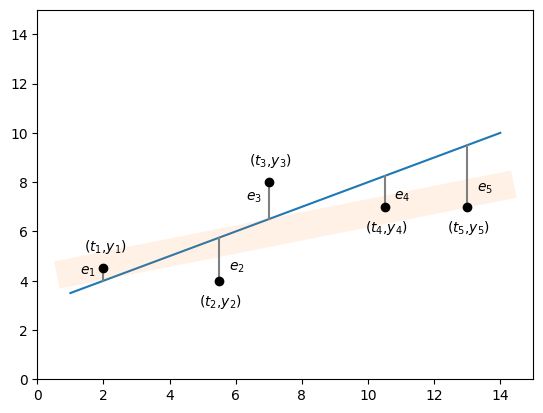

In [ ]:
img_lsq_data()

##### example 03

continues example 01.
<br/><br/>

find best fit line for $(t,y) = (1,2),(-1,1),(1,3)$.


find best $c_1,c_2$ for model $y=c_1 + c_2t$.

\begin{align}
  c_1 + c_2(1) &= 2 \\
  c_1 + c_2(-1) &= 1 \\
  c_1 + c_2(1) &= 3 \\
  \\
  &\Downarrow \\
  \\
  \begin{bmatrix} 1 & 1 \\ 1 & -1 \\ 1 & 1 \end{bmatrix}
  \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} &=
  \begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  c = \begin{bmatrix} c_1 \\ c_2 \end{bmatrix}
  &= \begin{bmatrix} \frac{7}{4} \\ \frac{3}{4} \end{bmatrix}.
\end{align}

|t|y|line|error|
|-:|-:|-:|-:|
1|2|2.5|-0.5
-1|1|1.0|0.0
1|3|2.5|0.5

$\Rightarrow\quad RMSE = \frac{1}{\sqrt{6}}$.

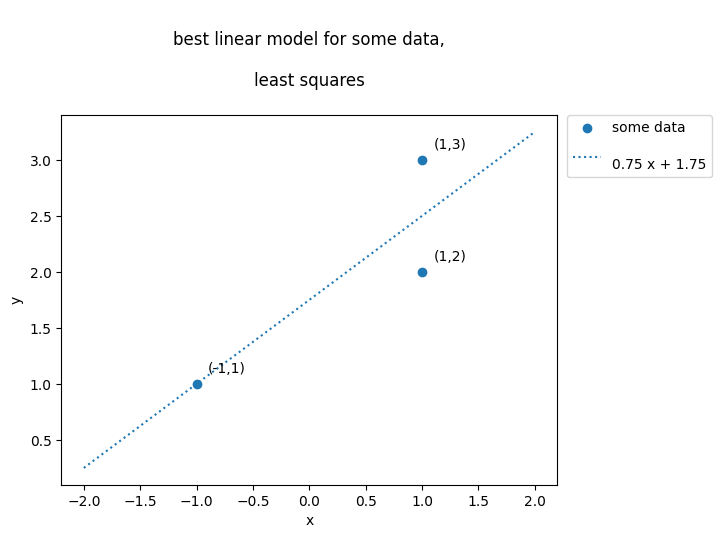


  SE: [0.5]

RMSE: [0.40824829]



,t,y,model,error
0,1.0,2.0,2.5,-0.5000
1,-1.0,1.0,1.0,-0.0000
2,1.0,3.0,2.5,0.5000


In [ ]:
eg_03()

##### algorithm <b>fitting data by least squares</b>

```
given data (t,y),

01 choose parameterized model - eg, f(t) = c[1] + c[2]*t;

02 force model to fit data - ie, y_hat = f(t);

03 solve with normal equations.
```

(they can look like this, too.)

##### example 04

find best fit line for $(t,y) = (-1,1),(0,0),(1,0),(2,-2)$.

1.  for model $y = c_1 + c_2t$.

\begin{align}
  c_1 + c_2(-1) &= 1 \\
  c_1 + c_2(0) &= 0 \\
  c_1 + c_2(1) &= 0 \\
  c_1 + c_2(2) &= -2 \\
  \\
  &\Downarrow \\
  \\
  \begin{bmatrix} 1 & -1 \\ 1 & 0 \\ 1 & 1 \\ 1 & 2 \end{bmatrix}
  \begin{bmatrix} c_1 \\ c_2 \end{bmatrix}
  &= \begin{bmatrix} 1 \\ 0 \\ 0 \\ -2 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  \begin{bmatrix} 4 & 2 \\ 2 & 6 \end{bmatrix}
  \begin{bmatrix} c_1 \\ c_2 \end{bmatrix}
  &= \begin{bmatrix} -1 \\ -5 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  c = \begin{bmatrix} c_1 \\ c_2 \end{bmatrix}
  &= \begin{bmatrix} 0.2 \\ -0.9 \end{bmatrix}
\end{align}

|t|y|line|error|
|-:|-:|-:|-:|
-1|1|1.1|-0.1
0|0|0.2|-0.2
1|0|-0.7|0.7
2|-2|-1.6|-0.4

$\Rightarrow\quad SE = (-0.1)^2 + (-0.2)^2 + (0.7)^2 + (-0.4)^2 = 0.7, \quad RMSE = \sqrt{\frac{0.7}{4}} = 0.418$.

2. for model $y = c_1 + c_2t + c_3t^2$.

\begin{align}
  c_1 + c_2(-1) + c_3(-1)^2 &= 1 \\
  c_1 + c_2(0) + c_3(0)^2 &= 0 \\
  c_1 + c_2(1) + c_3(1)^2 &= 0 \\
  c_1 + c_2(2) + c_3(2)^2 &= -2 \\
  \\
  &\Downarrow \\
  \\
  \begin{bmatrix}
    1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4
  \end{bmatrix}
  \begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix}
  &= \begin{bmatrix} 1 \\ 0 \\ 0 \\ -2 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  \begin{bmatrix}
    4 & 2 & 6 \\ 2 & 6 & 8 \\ 6 & 8 & 18
  \end{bmatrix}
  \begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix}
  &= \begin{bmatrix} -1 \\ -5 \\ -7 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  c = \begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix}
  &= \begin{bmatrix} 0.45 \\ -0.65 \\ -0.25 \end{bmatrix}
\end{align}

|t|y|parabola|error|
|-:|-:|-:|-:|
-1|1|0.85|0.15
0|0|0.45|-0.45
1|0|-0.45|0.45
2|-2|-1.85|-0.15

$\Rightarrow\quad SE = (0.15)^2 + (-0.45)^2 + (0.45)^2 + (-0.15)^2 = 0.45, \quad RMSE = \sqrt{\frac{0.45}{4}} = 0.335$.

In [ ]:
#eg_04() # during lecture, ok?

## 3 conditioning of least squares

how accurately can least squares solution $\bar{x}$ be determined? consider a system where the true root is known.

##### example 05 van der monde matrix

let $x_1 = 2.0, x_2 = 2.2, \dots, x_{11} = 4.0$ and set $y_i = 1 + x_i + x_i^2 + x_i^3 + x_i^4 + x_i^5 + x_i^6 + x_i^7$ for $1\le i\le 11$. use normal equations to find least squares polynomial $P(x) = c_1 + c_2x + \dots + c_8x^7$ fitting $(x_i,y_i)$.

In [ ]:
eg_05(8,11,"meh")


sys: [1.00000036 0.99999912 1.00000091 0.99999948 1.00000018 0.99999996
 1.         1.        ] = meh

bc cond(vdm): 5408707369.66

lsq: [ -6.5451339   19.63513982 -18.52627454  12.25347206  -2.85328861
   1.78405095   0.91219801   1.00417562] = meh++

bc cond(ata): 64240895280342507520.00


In [ ]:
eg_05(3,3,"eh") # example 05, what happens with smaller system?


sys: [1. 1. 1.] = eh

bc cond(vdm): 251.03

lsq: [1. 1. 1.] = eh++

bc cond(ata): 63016.51


## resources

- least squares, normal equations [@mathemagician](https://www.youtube.com/watch?v=NWMgpaJXu2c) (5m), [example](https://www.youtube.com/watch?v=Nn0YGiVH4UY) (4m)
- least squares, normal equations [@jeffreychasnov](https://www.youtube.com/watch?v=WABC6wmuLOk) (15m)

- 3dplots [@matplotlib](https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html)
- axes ticks [@matplotlib](https://matplotlib.org/stable/users/explain/axes/axes_ticks.html)